In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
sim_month = 'April 2016'

In [3]:
# roughness_dir = '/Volumes/SEAGATE/july_2016/roughness_july2016_allmonth_from_Linux'

roughness_dir = '/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH'

In [4]:
os.path.isdir(roughness_dir)

True

In [5]:
# path to training dataset

# trainingDS_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"

trainingDS_dir = "/Volumes/SEAGATE/april_2016/"
# trainingDS_dir = "/Volumes/SEAGATE/july_2016/"


trainingDS_csv = "valDS_lon215_220_lat75_77_atmmodel_april_2016.csv"
# trainingDS_csv = "valDS_lon215_220_lat75_77_atmmodel_july_2016.csv"


old_trainig_ds = 'off'


# # old method
# trainingDS_csv = "atmmodel_april_2016.csv"
# old_trainig_ds = 'on'


In [6]:
old_trainig_ds

'off'

In [7]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
os.path.isfile(atm_trainigDS_fp)

True

In [8]:
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [9]:
atm_transect.shape

(2633, 15)

In [10]:
# info of path-orbit-block and then select absed on this info

atm_transect['path'].value_counts()

152    819
72     806
79     766
145    180
70      62
Name: path, dtype: int64

In [11]:
atm_transect['orbit'].value_counts()

86922    819
86917    806
86932    766
86907    180
86946     62
Name: orbit, dtype: int64

In [12]:
atm_transect['block'].value_counts()

9     819
28    721
29    703
30    210
10    180
Name: block, dtype: int64

In [13]:
# select POB to extract
# note: we selected an arbiterary POB as following 
# Arbitrary POB

selected_path = 152
selected_orbit = 86922
selected_block = 9



In [14]:
if (old_trainig_ds == 'on'):
    # rename columns
    atm_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                 ' line':'line', ' sample':'sample',\
                                ' rms':'mean_ATM_roughness'}, inplace=True)
    

In [15]:
atm_transect.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [16]:
# remove zeros

filter_zeros_cond = (atm_transect['path']==0) & (atm_transect['orbit']==0) & (atm_transect['block']==0)

zero_index_list = atm_transect.index[filter_zeros_cond].tolist()
print(len(zero_index_list))

atm_transect.drop(labels=zero_index_list, axis=0, inplace=True)
atm_transect.head()

0


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,145,86907,10,317,1510,75.461045,219.761789,0.569390,0.750148,1.325563,12.714000,0.5,2.5,-1,7.489642
1,145,86907,10,318,1510,75.462514,219.761603,0.574411,0.746131,1.336610,16.110000,0.5,4.0,-1,10.366661
2,145,86907,10,318,1509,75.464873,219.761316,0.572402,0.749144,1.330584,10.433333,0.5,1.5,-1,0.663191
3,145,86907,10,319,1509,75.465759,219.761192,0.574411,0.746131,1.324559,14.666000,0.5,5.0,-1,2.892885
4,145,86907,10,320,1509,75.468702,219.760834,0.543140,0.722240,1.273168,10.300000,0.5,0.5,-1,0.000000


In [17]:
# maybe if we want to select a smaller subset of transect, like the first 1000 points (or 10)

# max_step = 1119

max_step = atm_transect.shape[0]

atm_transect_small = atm_transect.iloc[0:max_step]

In [18]:
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2633 entries, 0 to 2632
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                2633 non-null   int64  
 1   orbit               2633 non-null   int64  
 2   block               2633 non-null   int64  
 3   line                2633 non-null   int64  
 4   sample              2633 non-null   int64  
 5   lat                 2633 non-null   float64
 6   lon                 2633 non-null   float64
 7    an                 2633 non-null   float64
 8    ca                 2633 non-null   float64
 9    cf                 2633 non-null   float64
 10  mean_ATM_roughness  2633 non-null   float64
 11   weight             2633 non-null   float64
 12  npts                2633 non-null   float64
 13   cloud              2633 non-null   int64  
 14   var                2633 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 329.1 KB


In [19]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [20]:
atm_transect_small = atm_transect_small.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2633 entries, 0 to 2632
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                2633 non-null   int64  
 1   orbit               2633 non-null   int64  
 2   block               2633 non-null   int64  
 3   line                2633 non-null   int64  
 4   sample              2633 non-null   int64  
 5   lat                 2633 non-null   float64
 6   lon                 2633 non-null   float64
 7    an                 2633 non-null   float64
 8    ca                 2633 non-null   float64
 9    cf                 2633 non-null   float64
 10  mean_ATM_roughness  2633 non-null   float64
 11   weight             2633 non-null   float64
 12  npts                2633 non-null   float64
 13   cloud              2633 non-null   int64  
 14   var                2633 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 329.1 KB


In [21]:
atm_transect_small.head()

,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,145,86907,10,317,1510,75.461045,219.761789,0.569390,0.750148,1.325563,12.714000,0.5,2.5,-1,7.489642
1,145,86907,10,318,1510,75.462514,219.761603,0.574411,0.746131,1.336610,16.110000,0.5,4.0,-1,10.366661
2,145,86907,10,318,1509,75.464873,219.761316,0.572402,0.749144,1.330584,10.433333,0.5,1.5,-1,0.663191
3,145,86907,10,319,1509,75.465759,219.761192,0.574411,0.746131,1.324559,14.666000,0.5,5.0,-1,2.892885
4,145,86907,10,320,1509,75.468702,219.760834,0.543140,0.722240,1.273168,10.300000,0.5,0.5,-1,0.000000


In [23]:
# set filters to select a MISR block

path_filter = (atm_transect_small['path']==selected_path)
orbit_filter = (atm_transect_small['orbit']==selected_orbit)
block_filter = (atm_transect_small['block']==selected_block)

atm_transect_small_filtered = atm_transect_small.loc[path_filter & orbit_filter & block_filter]
print('shape of DS after filtering for our target block... (%s, %s)' %atm_transect_small_filtered.shape)


shape of DS after filtering for our target block... (819, 15)


In [24]:
# sort by column ("line")

atm_transect_small_filtered.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
atm_transect_small_filtered.head(10)


/Applications/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
2429,152,86922,9,36,692,75.002052,219.822091,0.593815,0.884207,1.316073,8.508571,1.0,7.0,-1,1.748072
2428,152,86922,9,36,693,75.001468,219.822149,0.604984,0.887930,1.321657,9.540000,1.0,2.0,-1,0.380000
2430,152,86922,9,37,692,75.004108,219.821886,0.606845,0.884207,1.310488,9.360000,1.0,10.0,-1,3.158709
2431,152,86922,9,38,692,75.007043,219.821622,0.601261,0.874900,1.330965,15.000000,1.0,1.0,-1,0.000000
2432,152,86922,9,38,691,75.007334,219.821598,0.601261,0.874900,1.334688,8.348750,1.0,8.0,-1,2.277666
2433,152,86922,9,39,691,75.009685,219.821369,0.601261,0.874900,1.340272,7.642000,1.0,10.0,-1,1.922690
2434,152,86922,9,40,690,75.012617,219.821091,0.599399,0.867454,1.347718,5.921111,1.0,9.0,-1,0.424878
2435,152,86922,9,41,690,75.015262,219.820864,0.604984,0.867454,1.347718,10.702222,1.0,9.0,-1,1.778812
2436,152,86922,9,41,689,75.017901,219.820641,0.597538,0.874900,1.343995,10.400000,1.0,1.0,-1,0.000000
2437,152,86922,9,42,689,75.018197,219.820605,0.601261,0.873038,1.345857,9.961111,1.0,9.0,-1,0.822631


In [25]:
# check for duplicates in rows of dataset




## find <roughess.dat> files

In [27]:
misr_roughness_in_pixel_list = []


# for irow in range(atm_transect_small.shape[0]):
for irow in range(atm_transect_small_filtered.shape[0]):


#     path = atm_transect_small['#path'].iloc[irow]
#     orbit = atm_transect_small[' orbit'].iloc[irow]
#     block = atm_transect_small[' img_block'].iloc[irow]
#     line = atm_transect_small[' line'].iloc[irow]
#     sample = atm_transect_small[' sample'].iloc[irow]
    
    
    path = atm_transect_small_filtered['path'].iloc[irow]
    orbit = atm_transect_small_filtered['orbit'].iloc[irow]
    block = atm_transect_small_filtered['block'].iloc[irow]
    line = atm_transect_small_filtered['line'].iloc[irow]
    sample = atm_transect_small_filtered['sample'].iloc[irow]


    # zfill() path and string it
    if path < 100:
        path_str = str(path).zfill(3)
    else:
        path_str = str(path)


    # zfill() block and string it
    if block < 10:
        block_str = str(block).zfill(2)
    else:
        block_str = str(block)


    # pattern of roughness.dat file
    roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
    print('looking for pattern: %s' %roughness_file_pattern)

    # find roughness file
    rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))
    print(rough_file_list)
    
    if (len(rough_file_list) < 1):
        raise ValueError("roughness list came out empty!")

    if (len(rough_file_list) > 1):
        raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    # open it and change binary to array
    rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)
    misr_roughness = rough_2d_arr[int(line), int(sample)]
    # append predixted value to our list
    misr_roughness_in_pixel_list.append(misr_roughness)

    

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

        
print("\ntotal MISR roughness files: %s" %len(misr_roughness_in_pixel_list))


looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roug

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa_refl_P152_O086922_B009.dat
['/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH/roughness_toa_refl_P152_O086922_B009.dat']
looking for pattern: roughness_toa

In [26]:
# def find_misr_roughness_per_pixel(atm_transect_small_filtered_in):

#     misr_roughness_in_pixel_list_out = []


#     # for irow in range(atm_transect_small.shape[0]):
#     for irow in range(atm_transect_small_filtered_in.shape[0]):


#     #     path = atm_transect_small['#path'].iloc[irow]
#     #     orbit = atm_transect_small[' orbit'].iloc[irow]
#     #     block = atm_transect_small[' img_block'].iloc[irow]
#     #     line = atm_transect_small[' line'].iloc[irow]
#     #     sample = atm_transect_small[' sample'].iloc[irow]


#         path = atm_transect_small_filtered_in['path'].iloc[irow]
#         orbit = atm_transect_small_filtered_in['orbit'].iloc[irow]
#         block = atm_transect_small_filtered_in['block'].iloc[irow]
#         line = atm_transect_small_filtered_in['line'].iloc[irow]
#         sample = atm_transect_small_filtered_in['sample'].iloc[irow]


#         # zfill() path and string it
#         if path < 100:
#             path_str = str(path).zfill(3)
#         else:
#             path_str = str(path)


#         # zfill() block and string it
#         if block < 10:
#             block_str = str(block).zfill(2)
#         else:
#             block_str = str(block)


#         # pattern of roughness.dat file
#         roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
#         print('looking for pattern: %s' %roughness_file_pattern)

#         # find roughness file
#         rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))

#         if (len(rough_file_list) < 1):
#             raise ValueError("roughness list came out empty!")

#         if (len(rough_file_list) > 1):
#             raise ValueError("roughness list includes more that 1 roughness file! there should be an error in our logic!")


#         # open it and change binary to array
#         rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     #     print(rough_2d_arr.shape)
#         misr_roughness = rough_2d_arr[int(line), int(sample)]
#         # append predixted value to our list
#         misr_roughness_in_pixel_list_out.append(misr_roughness)



#     #     if misr_roughness > 1:
#     #         misr_roughness_in_pixel_list_out.append(misr_roughness)
#     #     else:
#     #         print('MISR roughness in pixel: %s' %misr_roughness)
#     #         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")


#     print("\ntotal MISR roughness files: %s" %len(misr_roughness_in_pixel_list_out))
    
#     return misr_roughness_in_pixel_list_out


In [27]:
# # call the function

# misr_roughness_in_pixel_list = find_misr_roughness_per_pixel(atm_transect_small_filtered)


total MISR roughness files: 0


In [28]:
misr_roughness_in_pixel_list

[13.340125873326462,
 13.791015864835348,
 15.383067248783059,
 13.80700300539839,
 14.977711054279624,
 14.64156288800638,
 14.379523963240631,
 14.735040012898484,
 14.659148530160707,
 14.53825533371894,
 14.43555239792943,
 15.132457569875516,
 14.732776701471089,
 14.195417581951519,
 15.67338012349202,
 15.091755053204567,
 15.145320216377067,
 11.86029435974332,
 15.510953216893286,
 14.978431450573371,
 13.755733000160465,
 15.145320216377067,
 14.81722042746087,
 14.627824314645165,
 15.17040870691114,
 15.767725971293533,
 15.35341170849495,
 11.380089335025156,
 11.238663777924469,
 11.637467911853468,
 11.500806540671226,
 12.081476750963043,
 12.013344535025647,
 13.912875414100107,
 11.948417323574034,
 11.836421160109662,
 14.247108927463836,
 16.720521074764754,
 11.64118815286947,
 11.674598779307704,
 11.987196181426913,
 11.97387824943747,
 12.016949964703585,
 11.544826968755803,
 11.622263808248082,
 11.902090108241303,
 11.895185624900796,
 11.992687893061435,
 11

In [29]:
atm_transect_small_filtered.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [30]:
# build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

atm_transect_small_filtered['MISR-roughness'] = misr_roughness_in_pixel_list
atm_transect_small_filtered.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var',
       'MISR-roughness'],
      dtype='object')

In [31]:
# remove negative values from DF

negative_misr_index_list = atm_transect_small_filtered.loc[atm_transect_small_filtered['MISR-roughness'] < 0].index
print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_small_filtered))
atm_transect_small_filtered.drop(negative_misr_index_list, axis='index', inplace=True)
print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_small_filtered))


size of list before removing negative MISR-rough data: 0
size of list after removing negative MISR-rough data: 0


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
row_count = atm_transect_small_filtered.shape[0]
row_count

0

## plot transect

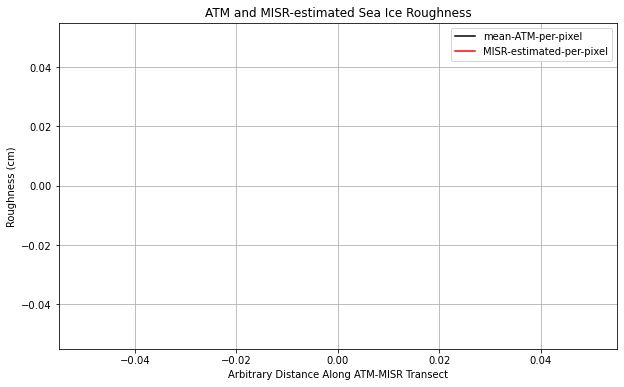

In [33]:
# x = range(len(misr_roughness_in_pixel_list))
x= range(row_count)

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, atm_transect_small_filtered['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, atm_transect_small_filtered['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# Same as above
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

## histogram of transect

/Applications/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Histogram')

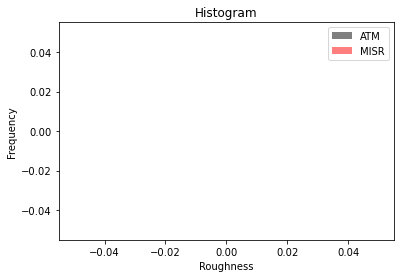

In [34]:
plt.hist(atm_transect_small_filtered['mean_ATM_roughness'], density=True, bins=20, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(atm_transect_small_filtered['MISR-roughness'], density=True, bins=20, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


## statistics of transect

In [35]:
# describe the statistics

atm_transect_small_filtered['mean_ATM_roughness'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: mean_ATM_roughness, dtype: float64

In [36]:
# change list to DF

# misr_roughness_in_pixel_df = pd.DataFrame(misr_roughness_in_pixel_list, columns=['rms'])

In [37]:
atm_transect_small_filtered['MISR-roughness'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MISR-roughness, dtype: float64

## now calculate histogram and statistics for the whole BOX

In [38]:
misr_roughness_in_pixel_list_box = find_misr_roughness_per_pixel(atm_transect_small)

looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking 

looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking 

looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking for pattern: roughness_toa_refl_P085_O088243_B027.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking 

looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking 

looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking 

looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking 

looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking 

looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking 

looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking 

looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking for pattern: roughness_toa_refl_P158_O088233_B008.dat
looking 

looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking for pattern: roughness_toa_refl_P069_O088242_B030.dat
looking 

looking for pattern: roughness_toa_refl_P149_O088247_B009.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking 

looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P076_O088257_B029.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking 

looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking for pattern: roughness_toa_refl_P156_O088262_B008.dat
looking 

looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking 

looking for pattern: roughness_toa_refl_P142_O088232_B012.dat
looking for pattern: roughness_toa_refl_P142_O088232_B012.dat
looking for pattern: roughness_toa_refl_P142_O088232_B012.dat
looking for pattern: roughness_toa_refl_P142_O088232_B012.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking 

looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking 

looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking for pattern: roughness_toa_refl_P083_O088272_B026.dat
looking 

looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking 

looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking for pattern: roughness_toa_refl_P142_O088232_B011.dat
looking 

looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking for pattern: roughness_toa_refl_P069_O088242_B029.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking for pattern: roughness_toa_refl_P085_O088243_B026.dat
looking 

looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking 

looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P149_O088247_B010.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking 

looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking for pattern: roughness_toa_refl_P076_O088257_B028.dat
looking 

looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking for pattern: roughness_toa_refl_P140_O088261_B011.dat
looking 

looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking for pattern: roughness_toa_refl_P140_O088261_B012.dat
looking 

looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking 

looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking for pattern: roughness_toa_refl_P083_O088272_B027.dat
looking 

In [39]:
# build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

atm_transect_small['MISR-roughness'] = misr_roughness_in_pixel_list_box
atm_transect_small.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var',
       'MISR-roughness'],
      dtype='object')

In [40]:
# remove negative values from DF

negative_misr_index_list_box = atm_transect_small.loc[atm_transect_small['MISR-roughness'] < 0].index
print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_small))
atm_transect_small.drop(negative_misr_index_list_box, axis='index', inplace=True)
print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_small))


size of list before removing negative MISR-rough data: 5541
size of list after removing negative MISR-rough data: 1735


## plot histogram for BOX

Text(0.5, 1.0, 'ATM vs. MISR for July 2016')

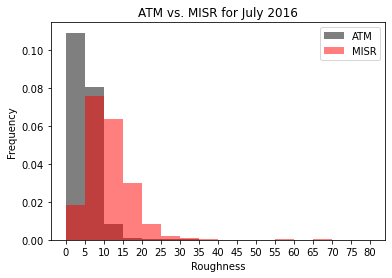

In [41]:
hist_bounds = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
n, bins, bounds=plt.hist(atm_transect_small['mean_ATM_roughness'], density=True, bins=hist_bounds, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(atm_transect_small['MISR-roughness'], density=True, bins=hist_bounds, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xticks(bins)
plt.xlabel('Roughness')
# plt.xticks(range(10))

plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("ATM vs. MISR for %s" %sim_month)


In [42]:
# describe ATM statistics of BOX

atm_transect_small['mean_ATM_roughness'].describe()

count    1735.000000
mean        5.562877
std         2.759348
min         2.720000
25%         4.050625
50%         4.793750
75%         6.096905
max        35.645000
Name: mean_ATM_roughness, dtype: float64

In [43]:
# describe MISR statistics of BOX

atm_transect_small['MISR-roughness'].describe()

count    1735.000000
mean       11.485463
std         6.795084
min         2.812500
25%         7.083289
50%        10.505910
75%        14.278867
max        92.032987
Name: MISR-roughness, dtype: float64

In [44]:
# april-box-good

# selected_path = 152
# selected_orbit = 86922
# selected_block = 9

# july-box-good

# selected_path = 149
# selected_orbit = 88247
# selected_block = 9


